In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ls import ls_first_improvement
from visual_utils import *
from perturbs import *

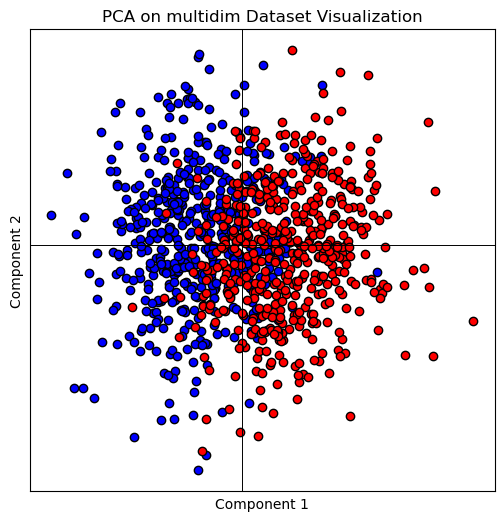

In [16]:
""" dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"]) """

dataset_dict = generate_multidimensional_dataset()
visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

fitness_fn_1 = lambda tree: fitness(tree, dataset_dict)

alt_dataset_dict = generate_small_dataset(n_samples=2000, random_seed=1101)
fitness_fn_2 = lambda tree: fitness(tree, alt_dataset_dict)

In [18]:
perturbation = lambda tree: combined_perturb(
    tree,
    feature_bounds=dataset_dict["feature_bounds"],
    prob_value=0.05,  # change value by a small step
    prob_add=0.06,  # expand leaf
    prob_prune=0.01, #prune somewhere
)
# perturbation = lambda tree: randomly_grow(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.03
# )


fitness_fn = fitness_fn_1

init_fn = "clever"
# "basic"
# "coinflip"
# "clever"

max_evals = 10_000
trials = 50

fitness_list = []
sizes = []
for trial in range(trials):

    results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        p_add=0.7,
        max_depth=3,
        feature_bounds=dataset_dict["feature_bounds"],
    )

    fitness_list.append(results["best_fitness"])
    sizes.append(results["best_tree"].size())

fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)


print("sizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

fitness: 
0.7294400000000002 0.014347348187034438
[0.733 0.732 0.749 0.736 0.724 0.749 0.735 0.704 0.716 0.73  0.73  0.737
 0.722 0.715 0.723 0.721 0.729 0.699 0.716 0.733 0.765 0.713 0.728 0.71
 0.724 0.721 0.731 0.729 0.712 0.721 0.737 0.725 0.739 0.748 0.755 0.757
 0.744 0.745 0.728 0.698 0.725 0.735 0.724 0.747 0.735 0.705 0.732 0.744
 0.728 0.734]
sizes: 
575.68 242.5506495559227
[ 375  473  465  647  521  821  777  169  555  615  795  647  319  387
  643  835  553  343  453  717  995  371  475  215  215  419  555  715
  237 1077  425 1305  483  559  629  993  565  483  763  599  653  457
  165  599  343  805 1057  681  333  503]


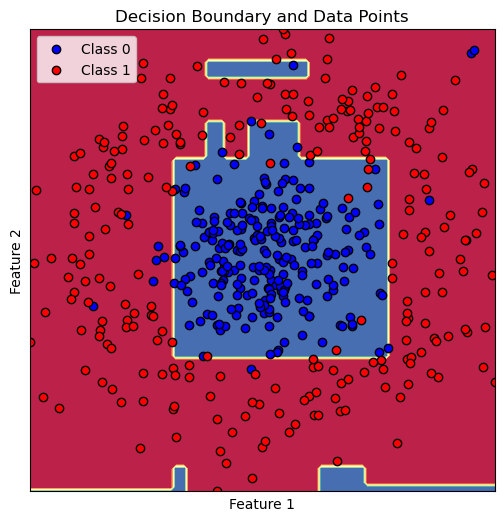

best fitness:  0.962
207


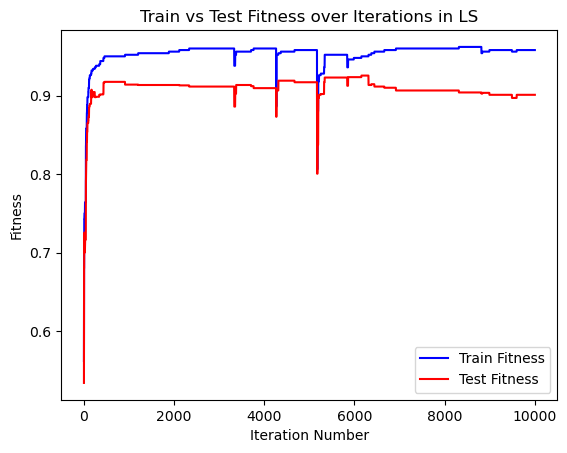

In [14]:

results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        feature_bounds=dataset_dict["feature_bounds"],
    )

best_tree = results["best_tree"]
visualise_tree_decision(best_tree, dataset_dict)
best = results["best_fitness"]
print("best fitness: ",best)

history = results["history"]

print(best_tree.size())

train_fitness = results["all_fitnesses"]
plt.plot(train_fitness)
plt.show()